# Analysis of the Coursera Course Dataset

## 1. Introduction

The goals of the project are to explore trends, practice fundamental exploratory data analysis (EDA), enhance data visualization skills using Matplotlib and Seaborn, and identify the best organizations for learning.

Coursera (open online course provider) Course dataset contains mainly 6 columns and 891 course data. (https://www.kaggle.com/datasets/siddharthm1698/coursera-course-dataset)

The dataset, `coursea_data.csv`, contains the following features:

**course_title** - Specifies the title of the course.

**course_organization** - Indicates the organization offering the course.

**course_Certificate_type** - Provides information about the types of certifications available for the course.

**course_rating** - Displays the ratings assigned to the course.

**course_difficulty** - Describes the difficulty level of the course.

**course_students_enrolled** - Shows the total number of students enrolled in the course.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
pd.set_option("display.max_colwidth", 200)
pd.set_option("future.no_silent_downcasting", True)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

## 2. Data Cleaning

In [3]:
courses = pd.read_csv("dataset/coursea_data.csv").drop("Unnamed: 0", axis=1)

In [4]:
courses.rename(
    columns={
        "course_title": "Course Title",
        "course_organization": "Course Organization",
        "course_Certificate_type": "Course Certificate Type",
        "course_rating": "Course Rating",
        "course_difficulty": "Course Difficulty",
        "course_students_enrolled": "Students Enrolled",
    },
    inplace=True,
)

In [5]:
courses.head()

,Course Title,Course Organization,Course Certificate Type,Course Rating,Course Difficulty,Students Enrolled
0,(ISC)² Systems Security Certified Practitioner (SSCP),(ISC)²,SPECIALIZATION,4.70,Beginner,5.3k
1,A Crash Course in Causality: Inferring Causal Effects from Observational Data,University of Pennsylvania,COURSE,4.70,Intermediate,17k
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.50,Mixed,130k
3,A Law Student's Toolkit,Yale University,COURSE,4.70,Mixed,91k
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.80,Mixed,320k


**Check for NaN values.**

In [6]:
missing_values_counts = courses.isna().sum()
print(f"How many NaN values:", sum(missing_values_counts))

How many NaN values: 0


**Converting the <font color='blue'>Students Enrolled</font> column to a numeric format.**

In [7]:
courses["Students Enrolled"] = (
    courses["Students Enrolled"].replace(r"[km]+$", "", regex=True).astype(float)
    * courses["Students Enrolled"]
    .str.extract(r"[\d\.]+([km]+)", expand=False)
    .replace(["k", "m"], [10**3, 10**6])
).astype("int64")

In [8]:
courses.tail()

,Course Title,Course Organization,Course Certificate Type,Course Rating,Course Difficulty,Students Enrolled
886,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.50,Intermediate,52000
887,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.80,Mixed,21000
888,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.50,Intermediate,30000
889,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.60,Intermediate,9800
890,Финансовые инструменты для частного инвестора,National Research University Higher School of Economics,SPECIALIZATION,4.70,Beginner,38000


## 3. Data Analysis

### 3.1 Initial Data checks

In [9]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Course Title             891 non-null    object 
 1   Course Organization      891 non-null    object 
 2   Course Certificate Type  891 non-null    object 
 3   Course Rating            891 non-null    float64
 4   Course Difficulty        891 non-null    object 
 5   Students Enrolled        891 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 41.9+ KB


In [10]:
courses.describe(include=["object"]).T

,count,unique,top,freq
Course Title,891,888,Developing Your Musicianship,2
Course Organization,891,154,University of Pennsylvania,59
Course Certificate Type,891,3,COURSE,582
Course Difficulty,891,4,Beginner,487


**Check for dublicates because some <font color='blue'>Courses Titles</font> are the same.**

In [11]:
courses_counts = courses["Course Title"].value_counts()
courses_with_more_organization = courses[
    courses["Course Title"].isin(courses_counts[courses_counts > 1].index)
]
courses_with_more_organization[
    [
        "Course Title",
        "Course Organization",
        "Course Certificate Type",
        "Course Rating",
        "Course Difficulty",
        "Students Enrolled",
    ]
]

,Course Title,Course Organization,Course Certificate Type,Course Rating,Course Difficulty,Students Enrolled
224,Developing Your Musicianship,Berklee College of Music,COURSE,4.80,Mixed,41000
225,Developing Your Musicianship,Berklee College of Music,SPECIALIZATION,4.80,Beginner,54000
563,Machine Learning,University of Washington,SPECIALIZATION,4.60,Intermediate,290000
564,Machine Learning,Stanford University,COURSE,4.90,Mixed,3200000
582,Marketing Digital,Universidade de São Paulo,COURSE,4.80,Beginner,81000
583,Marketing Digital,Universidad Austral,SPECIALIZATION,4.70,Beginner,39000


**Despite some courses having the same title, all 891 courses are unique.**

Reusable function to plot countplot and customize appearance:

In [12]:
def plot_countplot(ax, x, data, hue, title, order=None, legend=False):
    data_filtered = data[data[x].map(data[x].value_counts()) > 0]

    sns.countplot(
        x=x,
        data=data_filtered,
        hue=hue,
        palette="pastel",
        legend=legend,
        ax=ax,
        order=order,
    )
    ax.set_title(title, fontsize=18)
    ax.set(xlabel=None, ylabel=None)
    ax.set_facecolor("white")
    ax.grid(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    total_count = len(data_filtered)

    for bar in ax.patches:
        bar_height = bar.get_height()
        if bar_height > 0:
            percentage = (bar_height / total_count) * 100
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar_height + 0.1,
                f"{percentage:.2f}%",
                ha="center",
                va="bottom",
                color="black",
                fontsize=10,
            )

    y_max = ax.get_ylim()[1]
    ax.set_ylim(0, y_max * 1.02)

**Plotting <font color='blue'>Course Certificate Type</font> and <font color='blue'>Course Difficulty</font> distributions.**

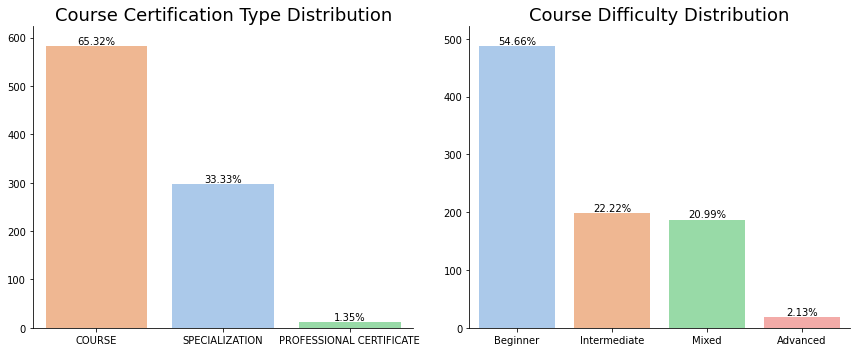

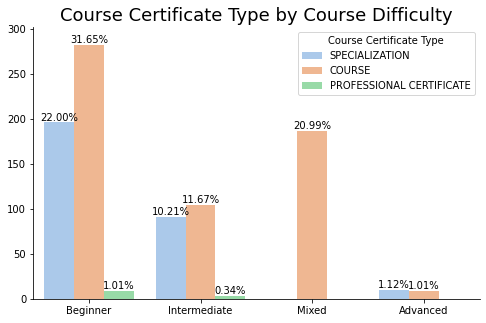

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

order_certificate = courses["Course Certificate Type"].value_counts().index
order_difficulty = courses["Course Difficulty"].value_counts().index

plot_countplot(
    axes[0],
    "Course Certificate Type",
    courses,
    "Course Certificate Type",
    "Course Certification Type Distribution",
    order_certificate,
)
plot_countplot(
    axes[1],
    "Course Difficulty",
    courses,
    "Course Difficulty",
    "Course Difficulty Distribution",
    order_difficulty,
)

plt.tight_layout()

fig, ax = plt.subplots(figsize=(8, 5))
plot_countplot(
    ax,
    "Course Difficulty",
    courses,
    "Course Certificate Type",
    "Course Certificate Type by Course Difficulty",
    legend=True,
)

plt.show()

**These trends reveal that organizations tend to offer a wide variety of beginner-level courses, with a stronger emphasis on general courses rather than specialized or professional certifications.**

### 3.2 Analysis of <font color='red'>Course Rating</font> and <font color='blue'>Students Enrolled</font> features

In [14]:
courses.describe()

,Course Rating,Students Enrolled
count,891.00,891.00
mean,4.68,90552.08
std,0.16,181936.45
min,3.30,1500.00
25%,4.60,17500.00
50%,4.70,42000.00
75%,4.80,99500.00
max,5.00,3200000.00


**Plotting the distributions and identify any outliers.**

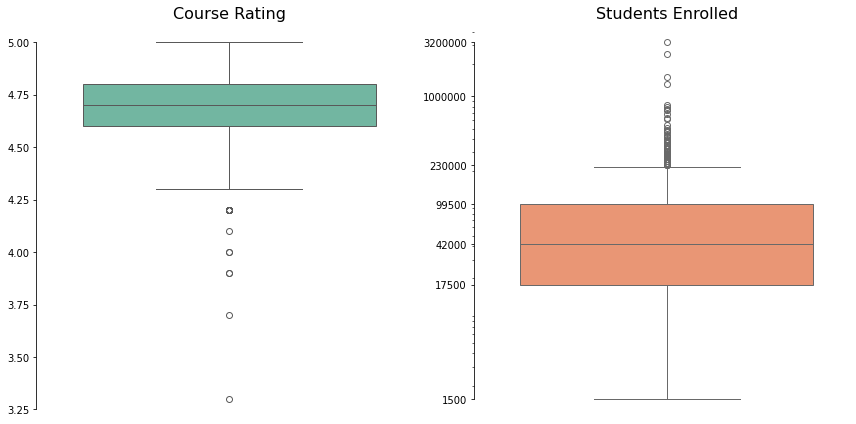

In [15]:
features = ["Course Rating", "Students Enrolled"]
colors = ["#66c2a5", "#fc8d62"]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, (feature, color) in enumerate(zip(features, colors)):
    sns.boxplot(data=courses, y=feature, ax=axes[i], color=color)
    axes[i].set_title(feature, fontsize=16)
    axes[i].set(ylabel=None)
    axes[i].set_facecolor("white")
    axes[i].grid(False)

axes[1].set_yscale("log")
y_ticks = [1500, 17500, 42000, 99500, 230000, 1000000, 3200000]
axes[1].set_yticks(y_ticks)
axes[1].set_yticklabels([f"{v:}" for v in y_ticks])

sns.despine(offset=10, trim=True)

plt.tight_layout()
plt.show()

* **Course Rating:** The ratings are generally high, with a narrow range. Most ratings fall between 4.60 and 4.80.
* **Students Enrolled:** Enrollments exhibit high variability, ranging from 1500 to 3200000 students. Most courses have between 17500 and 99500 students.
* **Outliers:** There are few outliers in <font color='red'>Course Rating</font>, while <font color='blue'>Students Enrolled</font> shows significant outliers with courses having extremely high enrollments.



**Printing outliers and calculating outliers ratio.**

In [16]:
feature = "Course Rating"

Q1 = courses[feature].quantile(0.25)
Q3 = courses[feature].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = courses[(courses[feature] < lower_bound) | (courses[feature] > upper_bound)]
outliers_sorted_asc = outliers.sort_values(by=feature, ascending=True)

print(f"Outliers sorted in ascending order for '{feature}':")
print(outliers_sorted_asc[feature])

outlier_ratio = len(outliers) / len(courses)

print(f"\nOutlier ratio for '{feature}': {outlier_ratio:.4f}")

Outliers sorted in ascending order for 'Course Rating':
413   3.30
566   3.70
569   3.90
873   3.90
598   4.00
522   4.00
414   4.10
59    4.20
515   4.20
445   4.20
331   4.20
402   4.20
590   4.20
640   4.20
676   4.20
182   4.20
844   4.20
Name: Course Rating, dtype: float64

Outlier ratio for 'Course Rating': 0.0191


In [17]:
feature = "Students Enrolled"

Q1 = courses[feature].quantile(0.25)
Q3 = courses[feature].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = courses[(courses[feature] < lower_bound) | (courses[feature] > upper_bound)]
outliers_sorted_desc = outliers.sort_values(by=feature, ascending=False)

print(f"\nOutliers sorted in descending order for '{feature}':")
print(outliers_sorted_desc[feature])

outlier_ratio = len(outliers) / len(courses)

print(f"\nOutlier ratio for '{feature}': {outlier_ratio:.4f}")


Outliers sorted in descending order for 'Students Enrolled':
564    3200000
815    2500000
688    1500000
674    1300000
196     830000
        ...   
215     240000
565     240000
260     230000
679     230000
605     230000
Name: Students Enrolled, Length: 78, dtype: int64

Outlier ratio for 'Students Enrolled': 0.0875


**Analyzing the relationship between <font color='red'>Course Rating</font> and <font color='blue'>Students Enrolled</font>.**

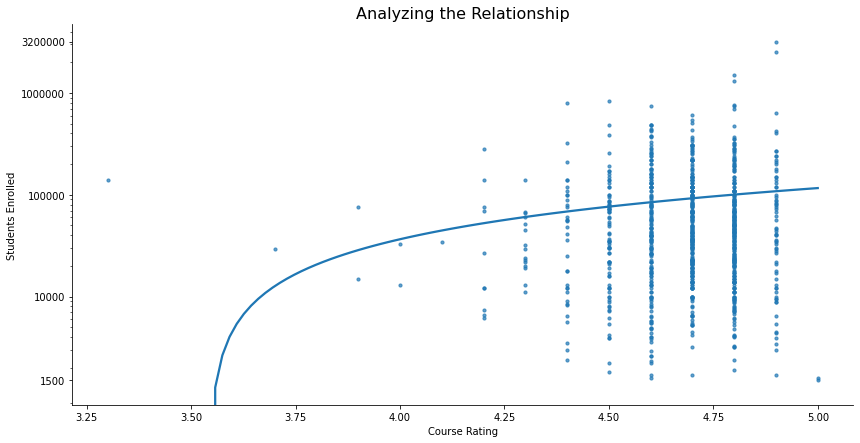

In [18]:
plt.figure(figsize=(14, 7))
sns.regplot(
    data=courses,
    x="Course Rating",
    y="Students Enrolled",
    scatter_kws={"s": 10, "alpha": 0.7},
    ci=None,
)

plt.yscale("log")
y_ticks = [1500, 10000, 100000, 1000000, 3200000]
plt.yticks(y_ticks, [f"{v:}" for v in y_ticks])

plt.grid(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title("Analyzing the Relationship", fontsize=16)

plt.show()

**There appears to be a non-linear relationship.**

Reusable function to plot correlation matrix:

In [19]:
def corr_plot(correlation_matrix, title="My Title", color="cividis"):
    plt.subplots(figsize=(10, 5))
    plt.title(title, fontsize=16)

    sns.heatmap(
        correlation_matrix,
        linewidths=0.2,
        vmax=0.7,
        square=True,
        cmap=color,
        linecolor="w",
        annot=True,
        annot_kws={"size": 9},
        cbar_kws={"shrink": 0.5},
    )

**Calculating Pearson correlation.**

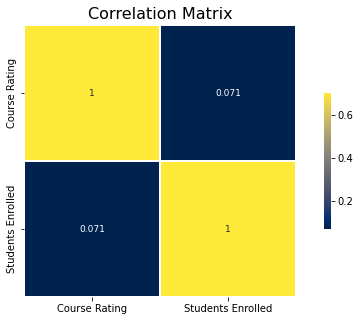

In [20]:
df_numeric = courses.select_dtypes(include=np.number)
correlation_matrix = df_numeric.corr()

corr_plot(correlation_matrix, "Correlation Matrix")

**No linear relationship identified.**

### 3.3 Analysing the distribution of <font color='blue'>Students Enrolled</font> by <font color='red'>Course Difficulty</font>, as well as by <font color='red'>Course Certificate Type</font>.

**Plotting distributions (using <font color='blue'>Students Enrolled</font> median values instead of mean, because values vary a lot).**

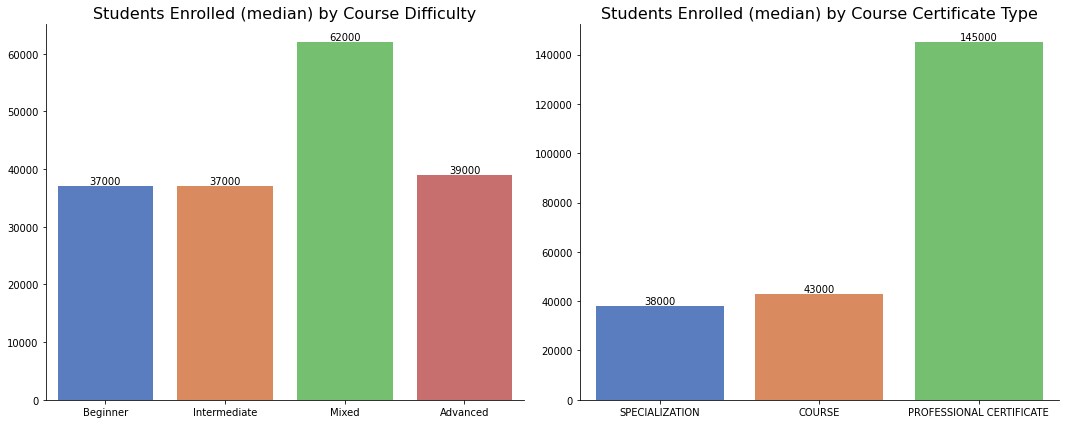

In [21]:
x_vars = ["Course Difficulty", "Course Certificate Type"]
titles = [
    "Students Enrolled (median) by Course Difficulty",
    "Students Enrolled (median) by Course Certificate Type",
]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for ax, x_var, title in zip(axes, x_vars, titles):
    sns.barplot(
        x=x_var,
        y="Students Enrolled",
        hue=x_var,
        data=courses,
        ax=ax,
        palette="muted",
        legend=False,
        estimator=np.median,
        errorbar=None,
    )
    ax.set_title(title, fontsize=16)
    ax.set(xlabel=None, ylabel=None)
    ax.set_ylim(0, None)
    ax.set_facecolor("white")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 0.05,
            f"{height:.0f}",
            ha="center",
            va="bottom",
            fontsize=10,
            color="black",
        )

plt.tight_layout()
plt.show()

* **Students enrolled in <font color='blue'>Mixed</font> difficulty courses are almost twice as frequent as others, which is expected since it falls between <font color='blue'>Intermediate</font> and <font color='blue'>Advanced</font> courses.**
* **Despite only a few courses offering a <font color='blue'>Professional Certificate</font>, these courses have more than three times as many students as other course types.**

### 3.4 Analysis by Organization in order to identify the best organizations for learning

In [22]:
organizations = (
    courses.groupby("Course Organization")
    .agg(
        Courses=("Course Organization", "count"),
        Students=("Students Enrolled", "median"),
        Rating=("Course Rating", "mean"),
    )
    .reset_index()
)

In [23]:
organizations.head()

,Course Organization,Courses,Students,Rating
0,(ISC)²,3,2900.00,4.73
1,Amazon Web Services,6,50000.00,4.55
2,American Institute of Business and Economics,1,11000.00,4.40
3,American Museum of Natural History,2,15000.00,4.75
4,Arizona State University,7,81000.00,4.77


**Analyzing the relationship between <font color='blue'>Students Enrolled</font> and <font color='red'>Courses</font>.**

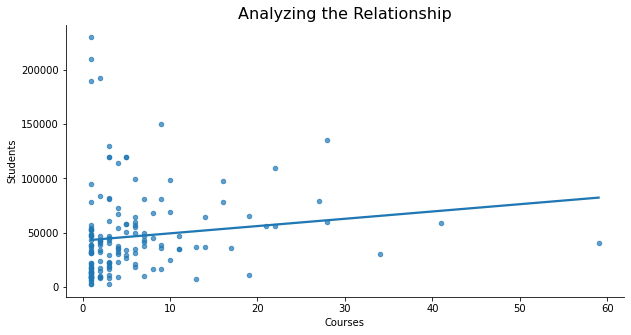

In [24]:
plt.figure(figsize=(10, 5))

sns.regplot(
    x=organizations["Courses"],
    y=organizations["Students"],
    scatter_kws={"s": 20, "alpha": 0.7},
    ci=None,
)
plt.grid(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title("Analyzing the Relationship", fontsize=16)

plt.show()

**There appears to be a weak linear relationship. Calculating Pearson correlation.**

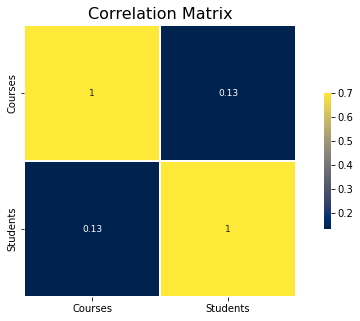

In [25]:
df_numeric = organizations[["Courses", "Students"]]
correlation_matrix = df_numeric.corr()

corr_plot(correlation_matrix, "Correlation Matrix")

**The number of students enrolled per organization shows a weak positive correlation with the number of courses offered. In general, organizations offering more courses do not necessarily have a higher number of enrolled students.**

**Creating a new feature as <font color='red'>Overall Rating</font>.**

In [26]:
numeric_columns = ["Courses", "Students", "Rating"]
non_numeric_columns = organizations.drop(columns=numeric_columns)

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(
    scaler.fit_transform(organizations[numeric_columns]), columns=numeric_columns
)

weights = {"Courses": 0.3, "Students": 0.5, "Rating": 0.2}
organizations["Overall Rating"] = (
    df_normalized[numeric_columns].mul(pd.Series(weights)).sum(axis=1)
)

**The weights were chosen as follows: <font color='red'>Students</font> (0.5) has the highest impact because enrollment reflects popularity and trust, <font color='red'>Courses</font> (0.3) has moderate influence as the number of courses offered increases selection opportunities, and <font color='red'>Rating</font> (0.2) has the smallest weight due to its consistently high average (4.68/5), which limits its differentiating effect.**

In [27]:
organizations.head()

,Course Organization,Courses,Students,Rating,Overall Rating
0,(ISC)²,3,2900.00,4.73,0.16
1,Amazon Web Services,6,50000.00,4.55,0.22
2,American Institute of Business and Economics,1,11000.00,4.40,0.06
3,American Museum of Natural History,2,15000.00,4.75,0.19
4,Arizona State University,7,81000.00,4.77,0.36


**Plotting Top 10 organizations.**

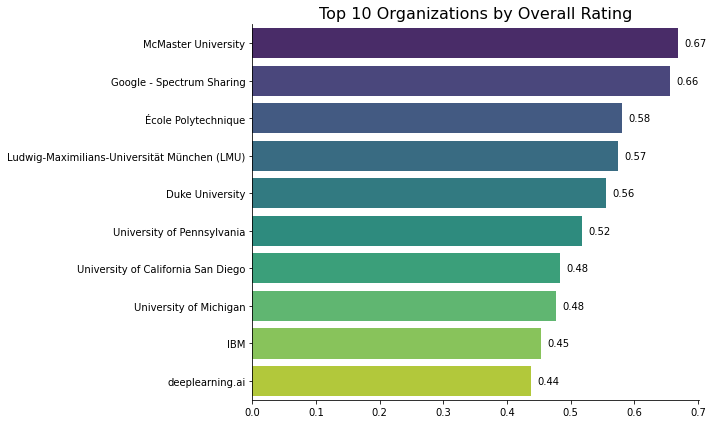

In [28]:
top_10_organizations = organizations.nlargest(10, "Overall Rating")

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x="Overall Rating",
    y="Course Organization",
    data=top_10_organizations,
    palette="viridis",
    hue="Course Organization",
    legend=False,
)

plt.title("Top 10 Organizations by Overall Rating", fontsize=16)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.gca().set_xlabel(None)
plt.gca().set_ylabel(None)

for p in ax.patches:
    ax.text(
        p.get_width() + 0.01,
        p.get_y() + p.get_height() / 2,
        f"{p.get_width():.2f}",
        ha="left",
        va="center",
        color="black",
        fontsize=10,
    )

plt.tight_layout()

plt.show()

## 4. Conclusions

* **The organizations tend to offer a wide variety of beginner-level courses, with a stronger emphasis on general courses rather than specialized or professional certifications.**
* **<font color='blue'>Students Enrolled</font> in <font color='red'>Mixed</font> difficulty courses are nearly twice as frequent as others, while <font color='red'>Professional Certificate</font> courses, though few in number, have more than three times as many students as other course types.**
* **Course ratings are generally high with a narrow range, while student enrollments exhibit high variability with significant outliers in the number of students.**
* **The selection of weights for identifying the best organizations is quite subjective. However, the <font color='red'>Turing College</font> is the best organization!** 

## 5. Suggestions for how my analysis could be improved

* **Data Transformation:** Converting <font color='blue'>Students Enrolled</font> to a numeric format was done, but categorizing this into ranges (e.g., small, medium, large) could provide additional insights.
* **Correlation Analysis:** The correlation matrix does not show significant relationships. Exploring more advanced techniques like Spearman correlation for non-linear relationships could add depth.